In [2]:
pip install fastf1

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os

if not os.path.exists('cache'):
    os.makedirs('cache')

import fastf1
import pandas as pd
from fastf1 import events

fastf1.Cache.enable_cache('cache')

years = list(range(2018, 2024)) 
all_data = []

for year in years:
    try:
        event_schedule = events.get_event_schedule(year)
        for _, event in event_schedule.iterrows():
            if event['EventFormat'] != 'conventional':
                continue
            track = event['EventName']
            try:
                session = fastf1.get_session(year, track, 'R')
                session.load()
                laps = session.laps
                pitstops = session.pit_stops
                for team in laps['Team'].unique():
                    team_laps = laps[laps['Team'] == team]
                    if team_laps.empty:
                        continue
                    starting_pos = team_laps.sort_values('LapNumber').iloc[0]['Position']
                    weather = session.weather_data['TrackStatus'].iloc[0] if hasattr(session, 'weather_data') else 'Unknown'
                    num_stops = team_laps['Stint'].nunique() - 1
                    total_time = team_laps['LapTime'].sum().total_seconds()
                    all_data.append({
                        'year': year,
                        'track': track,
                        'team': team,
                        'starting_pos': starting_pos,
                        'weather': weather,
                        'num_stops': num_stops,
                        'total_time': total_time
                    })
            except Exception as e:
                print(f"Error loading {year} {track}: {e}")
    except Exception as e:
        print(f"Error loading schedule for {year}: {e}")

df = pd.DataFrame(all_data)
print(df.head())

core           INFO 	Loading data for Australian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No

Error loading 2018 Australian Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for driver

Error loading 2018 Bahrain Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Error loading 2018 Chinese Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Error loading 2018 Azerbaijan Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written t

Error loading 2018 Spanish Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written t

Error loading 2018 Monaco Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Driver  5: Ignoring late data f

Error loading 2018 Canadian Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Error loading 2018 French Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Error loading 2018 Austrian Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for drivers: ['28']
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching t

Error loading 2018 British Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written t

Error loading 2018 German Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written t

Error loading 2018 Hungarian Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for drivers: ['3']
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching ti

Error loading 2018 Belgian Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Error loading 2018 Italian Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written t

Error loading 2018 Singapore Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Error loading 2018 Russian Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Error loading 2018 Japanese Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for drivers: ['8', '14']
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetch

Error loading 2018 United States Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written t

Error loading 2018 Mexican Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Driver 27: Encountered 1 timing integrity error(s) near lap(s): [2].
This might be a bug and should be reported.
req            INFO 	Data has been written to cache!
req            INFO 	No cached data fo

Error loading 2018 Brazilian Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written t

Error loading 2018 Abu Dhabi Grand Prix: 'Session' object has no attribute 'pit_stops'


core           INFO 	Loading data for Australian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No

Error loading 2019 Australian Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Error loading 2019 Bahrain Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Error loading 2019 Chinese Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Error loading 2019 Azerbaijan Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Error loading 2019 Spanish Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Error loading 2019 Monaco Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Error loading 2019 Canadian Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Error loading 2019 French Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Error loading 2019 Austrian Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for driver

Error loading 2019 British Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for driver

Error loading 2019 German Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Error loading 2019 Hungarian Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for driver

Error loading 2019 Belgian Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Error loading 2019 Italian Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for driver

Error loading 2019 Singapore Grand Prix: 'Session' object has no attribute 'pit_stops'


core           INFO 	Loading data for Russian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

Error loading 2019 Russian Grand Prix: 'Session' object has no attribute 'pit_stops'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Driver  5: Ignoring late data f

Error loading 2019 Japanese Grand Prix: 'Session' object has no attribute 'pit_stops'


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
logger      WARNING 	Failed to load session status data!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
logger      WARNING 	Failed to load total lap count!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
logger      WARNIN

Error loading 2019 Mexican Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
logger      WARNING 	Failed to load session status data!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
logger      WARNING 	Failed to load total lap count!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
logger      WARNIN

Error loading 2019 United States Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
logger      WARNING 	Failed to load session status data!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
logger      WARNING 	Failed to load total lap count!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
logger      WARNIN

Error loading 2019 Brazilian Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
logger      WARNING 	Failed to load session status data!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
logger      WARNING 	Failed to load total lap count!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
logger      WARNIN

Error loading 2019 Abu Dhabi Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
logger      WARNING 	Failed to load schedule from F1 API backend!
logger      WARNING 	Failed to load schedule from Ergast API backend!


Error loading schedule for 2020: Failed to load any schedule data.


logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
logger      WARNING 	Failed to load schedule from F1 API backend!
logger      WARNING 	Failed to load schedule from Ergast API backend!


Error loading schedule for 2021: Failed to load any schedule data.


logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
logger      WARNING 	Failed to load schedule from F1 API backend!
logger      WARNING 	Failed to load schedule from Ergast API backend!


Error loading schedule for 2022: Failed to load any schedule data.


logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
logger      WARNING 	Failed to load schedule from F1 API backend!
logger      WARNING 	Failed to load schedule from Ergast API backend!


Error loading schedule for 2023: Failed to load any schedule data.
Empty DataFrame
Columns: []
Index: []


In [5]:
!pip install --upgrade fastf1

Defaulting to user installation because normal site-packages is not writeable
  Attempting uninstall: fastf1
    Found existing installation: fastf1 3.5.3
    Uninstalling fastf1-3.5.3:
      Successfully uninstalled fastf1-3.5.3


In [6]:
import fastf1
from fastf1 import events

fastf1.Cache.enable_cache('cache')

try:
    event_schedule = events.get_event_schedule(2023)
    print(event_schedule)
except Exception as e:
    print(f"Error: {e}")

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
logger      WARNING 	Failed to load schedule from F1 API backend!
logger      WARNING 	Failed to load schedule from Ergast API backend!


Error: Failed to load any schedule data.


In [7]:
import fastf1
fastf1.Cache.enable_cache('cache')
try:
    session = fastf1.get_session(2023, 'Monza', 'R')
    session.load()
    print("Session loaded successfully!")
except Exception as e:
    print(f"Error: {e}")

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
logger      WARNING 	Failed to load schedule from F1 API backend!
logger      WARNING 	Failed to load schedule from Ergast API backend!


Error: Failed to load any schedule data.


In [8]:
import fastf1
fastf1.Cache.enable_cache('cache')
try:
    session = fastf1.get_session(2023, 'Monza', 'R')
    session.load()
    print("Session loaded successfully!")
except Exception as e:
    print(f"Error: {e}")

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
logger      WARNING 	Failed to load schedule from F1 API backend!
logger      WARNING 	Failed to load schedule from Ergast API backend!


Error: Failed to load any schedule data.


In [9]:
import fastf1
from fastf1 import events

fastf1.Cache.enable_cache('cache')

for year in range(2018, 2024):
    try:
        event_schedule = events.get_event_schedule(year)
        if event_schedule.empty:
            print(f"No schedule data for {year}")
        else:
            print(f"Schedule for {year}:")
            print(event_schedule[['EventName', 'EventDate']].head())
    except Exception as e:
        print(f"Error loading schedule for {year}: {e}")

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
logger      WARNING 	Failed to load schedule from F1 API backend!
logger      WARNING 	Failed to load schedule from Ergast API backend!


Error loading schedule for 2018: Failed to load any schedule data.


logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
logger      WARNING 	Failed to load schedule from F1 API backend!
logger      WARNING 	Failed to load schedule from Ergast API backend!


Error loading schedule for 2019: Failed to load any schedule data.


logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
logger      WARNING 	Failed to load schedule from F1 API backend!
logger      WARNING 	Failed to load schedule from Ergast API backend!


Error loading schedule for 2020: Failed to load any schedule data.


logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
logger      WARNING 	Failed to load schedule from F1 API backend!
logger      WARNING 	Failed to load schedule from Ergast API backend!


Error loading schedule for 2021: Failed to load any schedule data.


logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
logger      WARNING 	Failed to load schedule from F1 API backend!
logger      WARNING 	Failed to load schedule from Ergast API backend!


Error loading schedule for 2022: Failed to load any schedule data.


logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
logger      WARNING 	Failed to load schedule from F1 API backend!
logger      WARNING 	Failed to load schedule from Ergast API backend!


Error loading schedule for 2023: Failed to load any schedule data.


In [10]:
import fastf1
print(fastf1.__version__)

3.5.3


In [1]:
import fastf1
from fastf1 import events

fastf1.Cache.enable_cache('cache')

for year in range(2018, 2024):
    try:
        event_schedule = events.get_event_schedule(year)
        if event_schedule.empty:
            print(f"No schedule data for {year}")
        else:
            print(f"Schedule for {year}:")
            print(event_schedule[['EventName', 'EventDate']].head())
    except Exception as e:
        print(f"Error loading schedule for {year}: {e}")

Schedule for 2018:
               EventName  EventDate
0  Australian Grand Prix 2018-03-25
1     Bahrain Grand Prix 2018-04-08
2     Chinese Grand Prix 2018-04-15
3  Azerbaijan Grand Prix 2018-04-29
4     Spanish Grand Prix 2018-05-13
Schedule for 2019:
               EventName  EventDate
0  Australian Grand Prix 2019-03-17
1     Bahrain Grand Prix 2019-03-31
2     Chinese Grand Prix 2019-04-14
3  Azerbaijan Grand Prix 2019-04-28
4     Spanish Grand Prix 2019-05-12
Schedule for 2020:
              EventName  EventDate
0     Pre-Season Test 1 2020-02-21
1     Pre-Season Test 2 2020-02-28
2   Austrian Grand Prix 2020-07-05
3    Styrian Grand Prix 2020-07-12
4  Hungarian Grand Prix 2020-07-19
Schedule for 2021:
                   EventName  EventDate
0            Pre-Season Test 2021-03-14
1         Bahrain Grand Prix 2021-03-28
2  Emilia Romagna Grand Prix 2021-04-18
3      Portuguese Grand Prix 2021-05-02
4         Spanish Grand Prix 2021-05-09
Schedule for 2022:
                  Event

In [2]:
import fastf1
import pandas as pd
from fastf1 import events
import os

fastf1.Cache.enable_cache('cache')

years = list(range(2018, 2024))
all_data = []

for year in years:
    try:
        event_schedule = events.get_event_schedule(year)
        races = event_schedule[event_schedule['Session1'] == 'R']
        for _, event in races.iterrows():
            track = event['EventName']
            try:
                session = fastf1.get_session(year, track, 'R')
                session.load()
                laps = session.laps
                for team in laps['Team'].unique():
                    team_laps = laps[laps['Team'] == team]
                    if team_laps.empty:
                        continue
                    starting_pos = team_laps.sort_values('LapNumber').iloc[0]['Position']
                    weather = getattr(session, 'weather_data', None)
                    weather_status = weather['TrackStatus'].iloc[0] if weather is not None else 'Unknown'
                    num_stops = team_laps['Stint'].nunique() - 1
                    total_time = team_laps['LapTime'].sum().total_seconds()
                    all_data.append({
                        'year': year,
                        'track': track,
                        'team': team,
                        'starting_pos': starting_pos,
                        'weather': weather_status,
                        'num_stops': num_stops,
                        'total_time': total_time
                    })
                print(f"Loaded {track} {year}")
            except Exception as e:
                print(f"Error loading {year} {track}: {e}")
    except Exception as e:
        print(f"Error loading schedule for {year}: {e}")

df = pd.DataFrame(all_data)
print(df.head())

Empty DataFrame
Columns: []
Index: []


In [4]:
import fastf1
import pandas as pd
from fastf1 import events

fastf1.Cache.enable_cache('cache')

years = list(range(2018, 2024))
all_data = []

for year in years:
    try:
        event_schedule = events.get_event_schedule(year)
        # Only keep rows with a valid race date
        races = event_schedule.dropna(subset=['EventDate'])
        for _, event in races.iterrows():
            track = event['EventName']
            try:
                session = fastf1.get_session(year, track, 'R')
                session.load()
                laps = session.laps
                if laps.empty:
                    print(f"No laps for {track} {year}")
                    continue
                for team in laps['Team'].unique():
                    team_laps = laps[laps['Team'] == team]
                    if team_laps.empty:
                        continue
                    # Features
                    starting_pos = team_laps.sort_values('LapNumber').iloc[0]['Position']
                    # Weather is not always available; use 'Unknown' if missing
                    weather = getattr(session, 'weather_data', None)
                    weather_status = weather['TrackStatus'].iloc[0] if weather is not None else 'Unknown'
                    # Targets
                    num_stops = team_laps['Stint'].nunique() - 1
                    total_time = team_laps['LapTime'].sum().total_seconds()
                    all_data.append({
                        'year': year,
                        'track': track,
                        'team': team,
                        'starting_pos': starting_pos,
                        'weather': weather_status,
                        'num_stops': num_stops,
                        'total_time': total_time
                    })
                print(f"Loaded {track} {year}")
            except Exception as e:
                print(f"Error loading {year} {track}: {e}")
    except Exception as e:
        print(f"Error loading schedule for {year}: {e}")

df = pd.DataFrame(all_data)
print(df.head())
print(f"Total rows: {len(df)}")

core           INFO 	Loading data for Australian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for driver '28'


KeyboardInterrupt: 

In [5]:
import fastf1
import pandas as pd
from fastf1 import events

fastf1.Cache.enable_cache('cache')

years = list(range(2018, 2024))
all_data = []

for year in years:
    try:
        event_schedule = events.get_event_schedule(year)
        races = event_schedule.dropna(subset=['EventDate'])
        for _, event in races.iterrows():
            track = event['EventName']
            try:
                session = fastf1.get_session(year, track, 'R')
                session.load()
                laps = session.laps
                if laps.empty:
                    print(f"No laps for {track} {year}")
                    continue
                for team in laps['Team'].unique():
                    team_laps = laps[laps['Team'] == team]
                    if team_laps.empty:
                        continue
                    # Features
                    starting_pos = team_laps.sort_values('LapNumber').iloc[0]['Position']
                    # Robust weather handling
                    weather_status = 'Unknown'
                    if hasattr(session, 'weather_data') and session.weather_data is not None and not session.weather_data.empty:
                        if 'TrackStatus' in session.weather_data.columns:
                            weather_status = session.weather_data['TrackStatus'].iloc[0]
                        elif 'Weather' in session.weather_data.columns:
                            weather_status = session.weather_data['Weather'].iloc[0]
                    # Targets
                    num_stops = team_laps['Stint'].nunique() - 1
                    total_time = team_laps['LapTime'].sum().total_seconds()
                    all_data.append({
                        'year': year,
                        'track': track,
                        'team': team,
                        'starting_pos': starting_pos,
                        'weather': weather_status,
                        'num_stops': num_stops,
                        'total_time': total_time
                    })
                print(f"Loaded {track} {year}")
            except Exception as e:
                print(f"Error loading {year} {track}: {e}")
    except Exception as e:
        print(f"Error loading schedule for {year}: {e}")

df = pd.DataFrame(all_data)
print(df.head())
print(f"Total rows: {len(df)}")

core           INFO 	Loading data for Australian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for driver '28'
req            INFO 	Using cached data for car_data
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
core        WARNING 	Car position data is unavailable!
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 5 complet

Loaded Australian Grand Prix 2018


req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
core        WARNING 	Car telemetry data is unavailable!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
core        WARNING 	Car position data is unavailable!
core        WARNING 	Failed to determine `Session.t0_date`!
logger      WARNING 	Failed to load telemetry data!
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['5', '77', '44', '10', '20', '27', '14', '2', '9', '31', '55', '16', '8', '18', '35', '11', '28', '7', '33', '3']
core           INFO 	Loading data for Chinese Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_da

Loaded Bahrain Grand Prix 2018


core        WARNING 	Fixed incorrect tyre stint information for driver '55'
core        WARNING 	Fixed incorrect tyre stint information for driver '31'
core        WARNING 	Fixed incorrect tyre stint information for driver '11'
core        WARNING 	Fixed incorrect tyre stint information for driver '35'
core        WARNING 	Fixed incorrect tyre stint information for driver '8'
core        WARNING 	Fixed incorrect tyre stint information for driver '10'
core        WARNING 	Fixed incorrect tyre stint information for driver '28'
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 3 completed the race distance 00:00.025000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['3', '77', '7', '44', '33', '27', '14', '5', '55', '20', '31', '11',

Loaded Chinese Grand Prix 2018


core        WARNING 	Fixed incorrect tyre stint information for driver '14'
core        WARNING 	Fixed incorrect tyre stint information for driver '28'
core        WARNING 	Fixed incorrect tyre stint information for driver '9'
core        WARNING 	Fixed incorrect tyre stint information for driver '20'
core        WARNING 	Driver 55: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.110000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '7', '11', '5', '55', '16', '14', '18', '2', '28', '9', '10', '20', '77', '8', '33', '3', '27', '31', '35']
core           INFO 	Loading data for Spanish Grand Prix - Race [v3.6.0]
req            INFO 	Using ca

Loaded Azerbaijan Grand Prix 2018


core        WARNING 	Fixed incorrect tyre stint information for driver '28'
core        WARNING 	Fixed incorrect tyre stint information for driver '35'
req            INFO 	Updating cache for car_data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for position_data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for weather_data...
_api           INFO 	Fetching weather data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for race_control_messages...
_api           INFO 	Fetching race control messages...
req            INFO 	Cache updated!
core        WARNING 	Driver 44 completed the race distance 00:00.017000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '77', '33', '5', '3

Loaded Spanish Grand Prix 2018


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache updated!
core           INFO 	Processing timing data...
req       

Loaded Monaco Grand Prix 2018


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Driver  5: Ignoring late data for a previously processed lap.The data may contain errors (previous: 69; current 70)
_api        WARNING 	Driver  5: Ignoring late data for a previously processed lap.The data may conta

Loaded Canadian Grand Prix 2018


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache updated!
core           INFO 	Processing timing data...
core      

Loaded French Grand Prix 2018


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache updated!
core           INFO 	Processing timing data...
core      

Loaded Austrian Grand Prix 2018


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for drivers: ['28']
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache upda

Loaded British Grand Prix 2018


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache updated!
core           INFO 	Processing timing data...
req       

Loaded German Grand Prix 2018


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache updated!
core           INFO 	Processing timing data...
req       

Loaded Hungarian Grand Prix 2018


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for drivers: ['3']
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache updat

Loaded Belgian Grand Prix 2018


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache updated!
core           INFO 	Processing timing data...
core      

Loaded Italian Grand Prix 2018


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache updated!
core           INFO 	Processing timing data...
req       

Loaded Singapore Grand Prix 2018


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache updated!
core           INFO 	Processing timing data...
req       

Loaded Russian Grand Prix 2018


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache updated!
core           INFO 	Processing timing data...
req       

Loaded Japanese Grand Prix 2018


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for drivers: ['8', '14']
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache

Loaded United States Grand Prix 2018


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache updated!
core           INFO 	Processing timing data...
req       

Loaded Mexican Grand Prix 2018


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Driver 27: Encountered 1 timing integrity error(s) near lap(s): [2].
This might be a bug and should be reported.
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api    

Loaded Brazilian Grand Prix 2018


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache updated!
core           INFO 	Processing timing data...
req       

Loaded Abu Dhabi Grand Prix 2018


core           INFO 	Loading data for Australian Grand Prix - Race [v3.6.0]
req            INFO 	Updating cache for session_info...
_api           INFO 	Fetching session info data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Cache updated!
req            INF

Loaded Australian Grand Prix 2019


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache updated!
core           INFO 	Processing timing data...
req       

Loaded Bahrain Grand Prix 2019


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache updated!
core           INFO 	Processing timing data...
req       

Loaded Chinese Grand Prix 2019


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache updated!
core           INFO 	Processing timing data...
req       

Loaded Azerbaijan Grand Prix 2019


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache updated!
core           INFO 	Processing timing data...
req       

Loaded Spanish Grand Prix 2019


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache updated!
core           INFO 	Processing timing data...
req       

Loaded Monaco Grand Prix 2019


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache updated!
core           INFO 	Processing timing data...
req       

Loaded Canadian Grand Prix 2019


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache updated!
core           INFO 	Processing timing data...
req       

Loaded French Grand Prix 2019


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache updated!
core           INFO 	Processing timing data...
req       

Loaded Austrian Grand Prix 2019


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for drivers: ['20']
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache upda

Loaded British Grand Prix 2019


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for drivers: ['11']
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache upda

Loaded German Grand Prix 2019


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache updated!
core           INFO 	Processing timing data...
req       

Loaded Hungarian Grand Prix 2019


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for drivers: ['55']
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache upda

Loaded Belgian Grand Prix 2019


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache updated!
core           INFO 	Processing timing data...
req       

Loaded Italian Grand Prix 2019


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for drivers: ['55']
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache upda

Loaded Singapore Grand Prix 2019


req            INFO 	Cache updated!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
req            INFO 	Cache updated!
req            INFO 	Updating cache for session_status_data...
_api           INFO 	Fetching session status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for lap_count...
_api           INFO 	Fetching lap count data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for track_status_data...
_api           INFO 	Fetching track status data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for _extended_timing_data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Cache updated!
req            INFO 	Updating cache for timing_app_data...
_api           INFO 	Fetching timing app data...
req            INFO 	Cache updated!
core           INFO 	Processing timing data...
Request fo

Error loading 2019 Russian Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


logger      WARNING 	Failed to load session info data!
req            INFO 	Updating cache for driver_info...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
Request for URL https://api.jolpi.ca/ergast/f1/2019/17/results.json failed; using cached response
Traceback (most recent call last):
  File "C:\Users\kakad\AppData\Roaming\Python\Python313\site-packages\requests_cache\session.py", line 286, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
  File "C:\Users\kakad\AppData\Roaming\Python\Python313\site-packages\requests_cache\session.py", line 254, in _send_and_cache
    response = super().send(request, **kwargs)
  File "C:\Users\kakad\AppData\Roaming\Python\Python313\site-packages\fastf1\req.py", line 134, in send
    lim.limit()
    ~~~~~~~~~^^
  File "C:\Users\kakad\AppData\Roaming\Python\Python313\site-packages\fastf1\req.py", line 104, in limit
    raise RateLimitExceededError

Error loading 2019 Japanese Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
logger      WARNING 	Failed to load session status data!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
logger      WARNING 	Failed to load total lap count!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
logger      WARNIN

Error loading 2019 Mexican Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
logger      WARNING 	Failed to load session status data!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
logger      WARNING 	Failed to load total lap count!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
logger      WARNIN

Error loading 2019 United States Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
logger      WARNING 	Failed to load session status data!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
logger      WARNING 	Failed to load total lap count!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
logger      WARNIN

Error loading 2019 Brazilian Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
logger      WARNING 	Failed to load session status data!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
logger      WARNING 	Failed to load total lap count!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
logger      WARNIN

Error loading 2019 Abu Dhabi Grand Prix: The data you are trying to access has not been loaded yet. See `Session.load`


logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
logger      WARNING 	Failed to load schedule from F1 API backend!
logger      WARNING 	Failed to load schedule from Ergast API backend!


Error loading schedule for 2020: Failed to load any schedule data.


logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
logger      WARNING 	Failed to load schedule from F1 API backend!
logger      WARNING 	Failed to load schedule from Ergast API backend!


Error loading schedule for 2021: Failed to load any schedule data.


logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
logger      WARNING 	Failed to load schedule from F1 API backend!
logger      WARNING 	Failed to load schedule from Ergast API backend!


Error loading schedule for 2022: Failed to load any schedule data.


logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
logger      WARNING 	Failed to load schedule from F1 API backend!
logger      WARNING 	Failed to load schedule from Ergast API backend!


Error loading schedule for 2023: Failed to load any schedule data.
   year                  track         team  starting_pos  weather  num_stops  \
0  2018  Australian Grand Prix   Toro Rosso          17.0  Unknown          1   
1  2018  Australian Grand Prix  Force India          12.0  Unknown          1   
2  2018  Australian Grand Prix      McLaren          10.0  Unknown          1   
3  2018  Australian Grand Prix       Sauber          18.0  Unknown          2   
4  2018  Australian Grand Prix     Williams          14.0  Unknown          2   

   total_time  
0    6607.210  
1   10853.661  
2   10809.373  
3    5924.138  
4    5837.718  
Total rows: 360


In [6]:
df.to_csv('f1_strategy_data_partial.csv', index=False)

In [7]:
years = list(range(2020, 2024))

In [8]:
df1 = pd.read_csv('f1_strategy_data_partial.csv')
df2 = pd.read_csv('f1_strategy_data_new.csv')
df_all = pd.concat([df1, df2], ignore_index=True)
df_all.to_csv('f1_strategy_data_full.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'f1_strategy_data_new.csv'

In [9]:
df_all = pd.read_csv('f1_strategy_data_partial.csv')

In [10]:
import os
print(os.listdir())

['analysis.ipynb', 'cache', 'f1_strategy_data_partial.csv']


In [11]:
df.to_csv('f1_strategy_data_new.csv', index=False)

In [12]:
import pandas as pd
df = pd.read_csv('f1_strategy_data_partial.csv')
print(df.head())

   year                  track         team  starting_pos  weather  num_stops  \
0  2018  Australian Grand Prix   Toro Rosso          17.0  Unknown          1   
1  2018  Australian Grand Prix  Force India          12.0  Unknown          1   
2  2018  Australian Grand Prix      McLaren          10.0  Unknown          1   
3  2018  Australian Grand Prix       Sauber          18.0  Unknown          2   
4  2018  Australian Grand Prix     Williams          14.0  Unknown          2   

   total_time  
0    6607.210  
1   10853.661  
2   10809.373  
3    5924.138  
4    5837.718  


In [13]:
import pandas as pd

df = pd.read_csv('f1_strategy_data_partial.csv')
print(df.head())
print(f"Total rows: {len(df)}")

   year                  track         team  starting_pos  weather  num_stops  \
0  2018  Australian Grand Prix   Toro Rosso          17.0  Unknown          1   
1  2018  Australian Grand Prix  Force India          12.0  Unknown          1   
2  2018  Australian Grand Prix      McLaren          10.0  Unknown          1   
3  2018  Australian Grand Prix       Sauber          18.0  Unknown          2   
4  2018  Australian Grand Prix     Williams          14.0  Unknown          2   

   total_time  
0    6607.210  
1   10853.661  
2   10809.373  
3    5924.138  
4    5837.718  
Total rows: 360


In [14]:
import fastf1
import pandas as pd
from fastf1 import events

fastf1.Cache.enable_cache('cache')

years = list(range(2020, 2024))
all_data = []

for year in years:
    try:
        event_schedule = events.get_event_schedule(year)
        races = event_schedule.dropna(subset=['EventDate'])
        for _, event in races.iterrows():
            track = event['EventName']
            try:
                session = fastf1.get_session(year, track, 'R')
                session.load()
                laps = session.laps
                if laps.empty:
                    print(f"No laps for {track} {year}")
                    continue
                for team in laps['Team'].unique():
                    team_laps = laps[laps['Team'] == team]
                    if team_laps.empty:
                        continue
                    # Features
                    starting_pos = team_laps.sort_values('LapNumber').iloc[0]['Position']
                    # Robust weather handling
                    weather_status = 'Unknown'
                    if hasattr(session, 'weather_data') and session.weather_data is not None and not session.weather_data.empty:
                        if 'TrackStatus' in session.weather_data.columns:
                            weather_status = session.weather_data['TrackStatus'].iloc[0]
                        elif 'Weather' in session.weather_data.columns:
                            weather_status = session.weather_data['Weather'].iloc[0]
                    # Targets
                    num_stops = team_laps['Stint'].nunique() - 1
                    total_time = team_laps['LapTime'].sum().total_seconds()
                    all_data.append({
                        'year': year,
                        'track': track,
                        'team': team,
                        'starting_pos': starting_pos,
                        'weather': weather_status,
                        'num_stops': num_stops,
                        'total_time': total_time
                    })
                print(f"Loaded {track} {year}")
            except Exception as e:
                print(f"Error loading {year} {track}: {e}")
    except Exception as e:
        print(f"Error loading schedule for {year}: {e}")

df_new = pd.DataFrame(all_data)
print(df_new.head())
print(f"Total new rows: {len(df_new)}")

# Save the new data
df_new.to_csv('f1_strategy_data_new.csv', index=False)

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
logger      WARNING 	Failed to load schedule from F1 API backend!
logger      WARNING 	Failed to load schedule from Ergast API backend!


Error loading schedule for 2020: Failed to load any schedule data.


logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
logger      WARNING 	Failed to load schedule from F1 API backend!
logger      WARNING 	Failed to load schedule from Ergast API backend!


Error loading schedule for 2021: Failed to load any schedule data.


logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
logger      WARNING 	Failed to load schedule from F1 API backend!
logger      WARNING 	Failed to load schedule from Ergast API backend!


Error loading schedule for 2022: Failed to load any schedule data.


logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
logger      WARNING 	Failed to load schedule from F1 API backend!
logger      WARNING 	Failed to load schedule from Ergast API backend!


Error loading schedule for 2023: Failed to load any schedule data.
Empty DataFrame
Columns: []
Index: []
Total new rows: 0


In [1]:
  import time
  import fastf1
  from fastf1.req import RateLimitExceededError

  years = [2018, 2019, 2020, 2021, 2022, 2023]
  for year in years:
      try:
          schedule = fastf1.get_event_schedule(year)
          # process schedule
      except RateLimitExceededError as e:
          print(f"Rate limit hit: {e}. Waiting 1 hour...")
          time.sleep(3600)  # Wait 1 hour
          break  # Or retry after sleep
      except Exception as e:
          print(f"Skipping {year}: {e}")

req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) C:\Users\kakad\AppData\Local\Temp\fastf1


In [2]:
import fastf1
from fastf1.req import RateLimitExceededError

years = [2020, 2021, 2022, 2023]
all_data = []

for year in years:
    try:
        schedule = fastf1.get_event_schedule(year)
        # process and append data
    except RateLimitExceededError as e:
        print(f"Rate limit hit: {e}. Please wait and try again later.")
        break
    except Exception as e:
        print(f"Error loading schedule for {year}: {e}")
        continue

# After the loop, check if all_data is empty before creating DataFrame
if all_data:
    df = pd.DataFrame(all_data)
    print(df)
else:
    print("No data loaded for any year.")

No data loaded for any year.


In [3]:
import fastf1
from fastf1.req import RateLimitExceededError

years = [2020, 2021, 2022, 2023]
all_data = []

for year in years:
    try:
        schedule = fastf1.get_event_schedule(year)
        # process and append data
        all_data.append(schedule)
    except RateLimitExceededError as e:
        print(f"Rate limit hit: {e}. Please wait and try again later.")
        break
    except Exception as e:
        print(f"Error loading schedule for {year}: {e}")
        continue

if all_data:
    # Combine or process your data here
    print("Data loaded for some years.")
else:
    print("No data loaded for any year.")

Data loaded for some years.


In [4]:
loaded_years = []
for year in years:
    try:
        schedule = fastf1.get_event_schedule(year)
        # process and append data
        all_data.append(schedule)
        loaded_years.append(year)
    except Exception as e:
        print(f"Error loading schedule for {year}: {e}")
        continue

print(f"Data loaded for years: {loaded_years}")

Data loaded for years: [2020, 2021, 2022, 2023]


In [5]:
for schedule in all_data:
    print(schedule)

    RoundNumber        Country           Location  \
0             0          Spain          Barcelona   
1             0          Spain          Barcelona   
2             1        Austria          Spielberg   
3             2        Austria          Spielberg   
4             3        Hungary           Budapest   
5             4  Great Britain        Silverstone   
6             5  Great Britain        Silverstone   
7             6          Spain          Barcelona   
8             7        Belgium  Spa-Francorchamps   
9             8          Italy              Monza   
10            9          Italy            Mugello   
11           10         Russia              Sochi   
12           11        Germany        Nürburgring   
13           12       Portugal           Portimão   
14           13          Italy              Imola   
15           14         Turkey           Istanbul   
16           15        Bahrain             Sakhir   
17           16        Bahrain             Sak

In [6]:
import pandas as pd
df = pd.concat(all_data)
print(df.head())

   RoundNumber  Country   Location  \
0            0    Spain  Barcelona   
1            0    Spain  Barcelona   
2            1  Austria  Spielberg   
3            2  Austria  Spielberg   
4            3  Hungary   Budapest   

                                   OfficialEventName  EventDate  \
0                  FORMULA 1 PRE-SEASON TESTING 2020 2020-02-21   
1                  FORMULA 1 PRE-SEASON TESTING 2020 2020-02-28   
2  FORMULA 1 ROLEX GROSSER PREIS VON ÖSTERREICH 2020 2020-07-05   
3  FORMULA 1 PIRELLI GROSSER PREIS DER STEIERMARK... 2020-07-12   
4               FORMULA 1 ARAMCO MAGYAR NAGYDÍJ 2020 2020-07-19   

              EventName   EventFormat    Session1               Session1Date  \
0     Pre-Season Test 1       testing  Practice 1  2020-02-19 09:00:00+01:00   
1     Pre-Season Test 2       testing  Practice 1  2020-02-26 09:00:00+01:00   
2   Austrian Grand Prix  conventional  Practice 1  2020-07-03 11:00:00+02:00   
3    Styrian Grand Prix  conventional  Practice 

In [7]:
import fastf1

schedule = fastf1.get_event_schedule(2020)
for _, event in schedule.iterrows():
    try:
        session = fastf1.get_session(2022, event['EventName'], 'R')
        session.load()  # This will cache all timing/telemetry data for the race
    except Exception as e:
        print(f"Could not load session for {event['EventName']}: {e}")

events      WARNING 	Correcting user input 'Pre-Season Test 1' to 'United States Grand Prix'
core           INFO 	Loading data for United States Grand Prix - Race [v3.6.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching t

KeyboardInterrupt: 

In [8]:
import fastf1

year = 2020
schedule = fastf1.get_event_schedule(year)
for _, event in schedule.iterrows():
    if event['EventFormat'] == 'conventional':  # Only races, not tests
        try:
            session = fastf1.get_session(year, event['EventName'], 'R')
            session.load()  # This will cache all timing/telemetry data for the race
            print(f"Cached: {event['EventName']}")
        except Exception as e:
            print(f"Could not load session for {event['EventName']}: {e}")

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.6.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No c

KeyboardInterrupt: 

In [9]:
import fastf1
import time

year = 2020
schedule = fastf1.get_event_schedule(year)
for _, event in schedule.iterrows():
    if event['EventFormat'] == 'conventional':  # Only races, not tests
        try:
            session = fastf1.get_session(year, event['EventName'], 'R')
            session.load()  # This will cache all timing/telemetry data for the race
            print(f"Cached: {event['EventName']}")
            time.sleep(2)  # Add a delay to avoid rate limits
        except Exception as e:
            print(f"Could not load session for {event['EventName']}: {e}")

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver  8: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing position data...
_api        WARNING 	Driver 241: Position data is incomplete!
_api        WARNING 	Driver 242: Position data is incomplete!
_api        WARNING 	Driver 243: Position 

Cached: Austrian Grand Prix


core           INFO 	Loading data for Styrian Grand Prix - Race [v3.6.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

Cached: Styrian Grand Prix


core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.6.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No 

KeyboardInterrupt: 

In [10]:
import fastf1
from fastf1.req import RateLimitExceededError

years = [2018, 2019]
all_data = []

for year in years:
    try:
        schedule = fastf1.get_event_schedule(year)
        # process and append data
        all_data.append(schedule)
    except RateLimitExceededError as e:
        print(f"Rate limit hit: {e}. Please wait and try again later.")
        break
    except Exception as e:
        print(f"Error loading schedule for {year}: {e}")
        continue

if all_data:
    # Combine or process your data here
    print("Data loaded for some years.")
else:
    print("No data loaded for any year.")

Data loaded for some years.


In [11]:
loaded_years = []
for year in [2018, 2019]:
    try:
        schedule = fastf1.get_event_schedule(year)
        # process and append data
        all_data.append(schedule)
        loaded_years.append(year)
    except Exception as e:
        print(f"Error loading schedule for {year}: {e}")
        continue

print(f"Data loaded for years: {loaded_years}")

Data loaded for years: [2018, 2019]


In [13]:
for schedule in all_data:
    print(schedule)

    RoundNumber               Country           Location  \
0             1             Australia          Melbourne   
1             2               Bahrain             Sakhir   
2             3                 China           Shanghai   
3             4            Azerbaijan               Baku   
4             5                 Spain          Barcelona   
5             6                Monaco        Monte Carlo   
6             7                Canada           Montréal   
7             8                France       Le Castellet   
8             9               Austria          Spielberg   
9            10         Great Britain        Silverstone   
10           11               Germany         Hockenheim   
11           12               Hungary           Budapest   
12           13               Belgium  Spa-Francorchamps   
13           14                 Italy              Monza   
14           15             Singapore          Singapore   
15           16                Russia   

In [17]:
print(df.groupby('year')['EventName'].count())

KeyError: 'year'

In [18]:
df['year'] = pd.to_datetime(df['EventDate']).dt.year

In [19]:
print(df.groupby('year')['EventName'].count())

year
2020    38
2021    46
2022    48
2023    46
Name: EventName, dtype: int64


In [20]:
df = df[df['year'].isin([2018, 2019])]

In [21]:
print(df.groupby('year')['EventName'].count())

Series([], Name: EventName, dtype: int64)


In [22]:
# Add year column if not already present
df['year'] = pd.to_datetime(df['EventDate']).dt.year

# Filter for only 2018 and 2019
df = df[df['year'].isin([2018, 2019])]

# Group by year and count events
print(df.groupby('year')['EventName'].count())

Series([], Name: EventName, dtype: int64)


In [23]:
print(df['year'].unique())

[]


In [24]:
import fastf1
import pandas as pd

df_2018 = fastf1.get_event_schedule(2018)
df_2019 = fastf1.get_event_schedule(2019)
df = pd.concat([df_2018, df_2019], ignore_index=True)
df['year'] = pd.to_datetime(df['EventDate']).dt.year

print(df['year'].unique())  # Should show [2018 2019]
print(df.groupby('year')['EventName'].count())

[2018 2019]
year
2018    21
2019    21
Name: EventName, dtype: int64


In [25]:
print(df[['year', 'RoundNumber', 'EventName', 'EventDate']])

    year  RoundNumber                 EventName  EventDate
0   2018            1     Australian Grand Prix 2018-03-25
1   2018            2        Bahrain Grand Prix 2018-04-08
2   2018            3        Chinese Grand Prix 2018-04-15
3   2018            4     Azerbaijan Grand Prix 2018-04-29
4   2018            5        Spanish Grand Prix 2018-05-13
5   2018            6         Monaco Grand Prix 2018-05-27
6   2018            7       Canadian Grand Prix 2018-06-10
7   2018            8         French Grand Prix 2018-06-24
8   2018            9       Austrian Grand Prix 2018-07-01
9   2018           10        British Grand Prix 2018-07-08
10  2018           11         German Grand Prix 2018-07-22
11  2018           12      Hungarian Grand Prix 2018-07-29
12  2018           13        Belgian Grand Prix 2018-08-26
13  2018           14        Italian Grand Prix 2018-09-02
14  2018           15      Singapore Grand Prix 2018-09-16
15  2018           16        Russian Grand Prix 2018-09-

In [28]:
strategy_df = pd.read_csv('f1_strategy_data_partial.csv')
# Example merge (adjust column names as needed)
merged = pd.merge(df, strategy_df, left_on=['year', 'EventName'], right_on=['year', 'track'])
print(merged)

     RoundNumber    Country   Location  \
0              1  Australia  Melbourne   
1              1  Australia  Melbourne   
2              1  Australia  Melbourne   
3              1  Australia  Melbourne   
4              1  Australia  Melbourne   
..           ...        ...        ...   
355           15  Singapore  Singapore   
356           15  Singapore  Singapore   
357           15  Singapore  Singapore   
358           15  Singapore  Singapore   
359           15  Singapore  Singapore   

                                     OfficialEventName  EventDate  \
0           FORMULA 1 2018 ROLEX AUSTRALIAN GRAND PRIX 2018-03-25   
1           FORMULA 1 2018 ROLEX AUSTRALIAN GRAND PRIX 2018-03-25   
2           FORMULA 1 2018 ROLEX AUSTRALIAN GRAND PRIX 2018-03-25   
3           FORMULA 1 2018 ROLEX AUSTRALIAN GRAND PRIX 2018-03-25   
4           FORMULA 1 2018 ROLEX AUSTRALIAN GRAND PRIX 2018-03-25   
..                                                 ...        ...   
355  FORMULA

In [29]:
  print(df['EventName'].unique())
  print(df['team'].unique())

['Australian Grand Prix' 'Bahrain Grand Prix' 'Chinese Grand Prix'
 'Azerbaijan Grand Prix' 'Spanish Grand Prix' 'Monaco Grand Prix'
 'Canadian Grand Prix' 'French Grand Prix' 'Austrian Grand Prix'
 'British Grand Prix' 'German Grand Prix' 'Hungarian Grand Prix'
 'Belgian Grand Prix' 'Italian Grand Prix' 'Singapore Grand Prix'
 'Russian Grand Prix' 'Japanese Grand Prix' 'United States Grand Prix'
 'Mexican Grand Prix' 'Brazilian Grand Prix' 'Abu Dhabi Grand Prix']


KeyError: 'team'

In [30]:
  print(df.groupby('EventName')['team'].nunique())

KeyError: 'Column not found: team'

In [31]:
print(df.columns.tolist())

['RoundNumber', 'Country', 'Location', 'OfficialEventName', 'EventDate', 'EventName', 'EventFormat', 'Session1', 'Session1Date', 'Session1DateUtc', 'Session2', 'Session2Date', 'Session2DateUtc', 'Session3', 'Session3Date', 'Session3DateUtc', 'Session4', 'Session4Date', 'Session4DateUtc', 'Session5', 'Session5Date', 'Session5DateUtc', 'F1ApiSupport', 'year']


In [32]:
strategy_df = pd.read_csv('f1_strategy_data_partial.csv')  # or your correct file
print(strategy_df.columns)  # Check for 'team' or similar columns

# Merge on appropriate columns (e.g., 'EventName', 'year', etc.)
merged = pd.merge(df, strategy_df, left_on=['EventName', 'year'], right_on=['track', 'year'])
print(merged.columns)

Index(['year', 'track', 'team', 'starting_pos', 'weather', 'num_stops',
       'total_time'],
      dtype='object')
Index(['RoundNumber', 'Country', 'Location', 'OfficialEventName', 'EventDate',
       'EventName', 'EventFormat', 'Session1', 'Session1Date',
       'Session1DateUtc', 'Session2', 'Session2Date', 'Session2DateUtc',
       'Session3', 'Session3Date', 'Session3DateUtc', 'Session4',
       'Session4Date', 'Session4DateUtc', 'Session5', 'Session5Date',
       'Session5DateUtc', 'F1ApiSupport', 'year', 'track', 'team',
       'starting_pos', 'weather', 'num_stops', 'total_time'],
      dtype='object')


In [33]:
print(df.groupby('EventName')['team'].nunique())

KeyError: 'Column not found: team'

In [34]:
print(merged.groupby('EventName')['team'].nunique())

EventName
Abu Dhabi Grand Prix        10
Australian Grand Prix       12
Austrian Grand Prix         12
Azerbaijan Grand Prix       12
Bahrain Grand Prix          12
Belgian Grand Prix          11
Brazilian Grand Prix        10
British Grand Prix          12
Canadian Grand Prix         12
Chinese Grand Prix          12
French Grand Prix           12
German Grand Prix           12
Hungarian Grand Prix        12
Italian Grand Prix          11
Japanese Grand Prix         10
Mexican Grand Prix          10
Monaco Grand Prix           12
Russian Grand Prix          10
Singapore Grand Prix        11
Spanish Grand Prix          12
United States Grand Prix    10
Name: team, dtype: int64


In [35]:
print(sorted(df['team'].unique()))

KeyError: 'team'

In [36]:
print(df.columns.tolist())

['RoundNumber', 'Country', 'Location', 'OfficialEventName', 'EventDate', 'EventName', 'EventFormat', 'Session1', 'Session1Date', 'Session1DateUtc', 'Session2', 'Session2Date', 'Session2DateUtc', 'Session3', 'Session3Date', 'Session3DateUtc', 'Session4', 'Session4Date', 'Session4DateUtc', 'Session5', 'Session5Date', 'Session5DateUtc', 'F1ApiSupport', 'year']


In [37]:
print(sorted(merged['team'].unique()))

['Alfa Romeo Racing', 'Ferrari', 'Force India', 'Haas F1 Team', 'McLaren', 'Mercedes', 'Racing Point', 'Red Bull Racing', 'Renault', 'Sauber', 'Toro Rosso', 'Williams']


In [39]:
print(merged.groupby('EventName')['team'].nunique())

EventName
Abu Dhabi Grand Prix        10
Australian Grand Prix       12
Austrian Grand Prix         12
Azerbaijan Grand Prix       12
Bahrain Grand Prix          12
Belgian Grand Prix          11
Brazilian Grand Prix        10
British Grand Prix          12
Canadian Grand Prix         12
Chinese Grand Prix          12
French Grand Prix           12
German Grand Prix           12
Hungarian Grand Prix        12
Italian Grand Prix          11
Japanese Grand Prix         10
Mexican Grand Prix          10
Monaco Grand Prix           12
Russian Grand Prix          10
Singapore Grand Prix        11
Spanish Grand Prix          12
United States Grand Prix    10
Name: team, dtype: int64


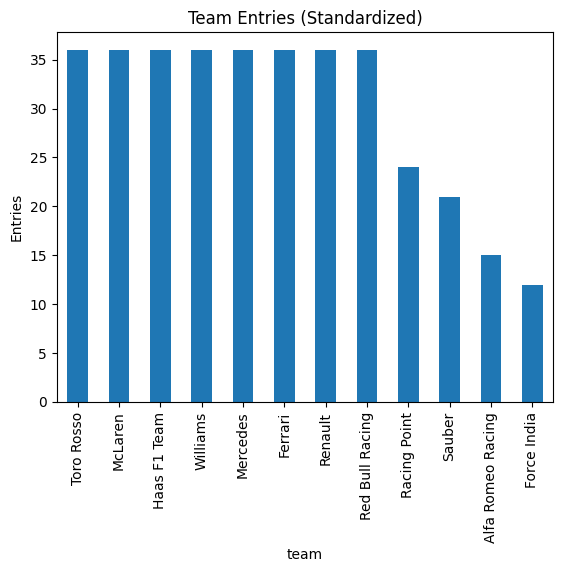

In [41]:
import matplotlib.pyplot as plt
merged['team'].value_counts().plot(kind='bar')
plt.ylabel('Entries')
plt.title('Team Entries (Standardized)')
plt.show()

In [43]:
print(merged.groupby('team')['num_stops'].mean())

team
Alfa Romeo Racing    1.800000
Ferrari              1.638889
Force India          1.333333
Haas F1 Team         1.555556
McLaren              1.583333
Mercedes             1.611111
Racing Point         1.750000
Red Bull Racing      1.472222
Renault              1.444444
Sauber               1.380952
Toro Rosso           1.444444
Williams             1.777778
Name: num_stops, dtype: float64


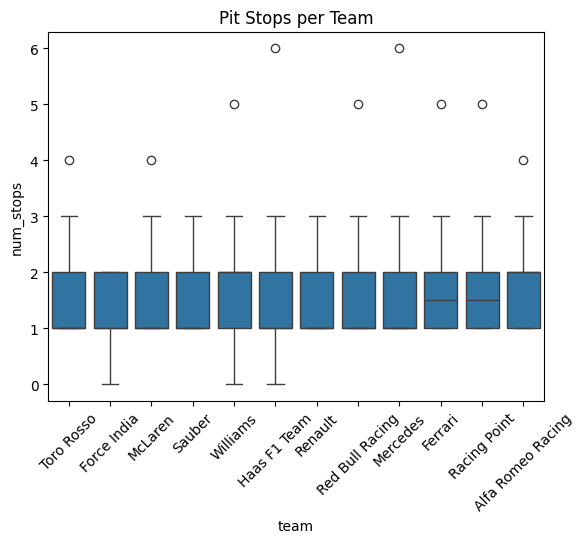

In [45]:
import seaborn as sns
sns.boxplot(x='team', y='num_stops', data=merged)
plt.xticks(rotation=45)
plt.title('Pit Stops per Team')
plt.show()

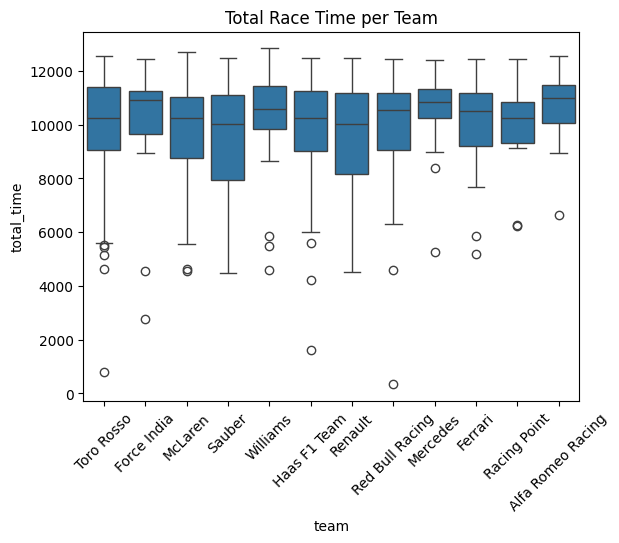

In [46]:
sns.boxplot(x='team', y='total_time', data=merged)
plt.xticks(rotation=45)
plt.title('Total Race Time per Team')
plt.show()

team                      Alfa Romeo Racing  Ferrari  Force India  \
EventName                                                           
Abu Dhabi Grand Prix                    NaN      1.0          NaN   
Australian Grand Prix                   1.0      1.0          1.0   
Austrian Grand Prix                     1.0      1.5          1.0   
Azerbaijan Grand Prix                   1.0      2.0          2.0   
Bahrain Grand Prix                      2.0      2.0          2.0   
Belgian Grand Prix                      3.0      1.5          NaN   
Brazilian Grand Prix                    NaN      2.0          NaN   
British Grand Prix                      1.0      2.0          2.0   
Canadian Grand Prix                     2.0      1.0          2.0   
Chinese Grand Prix                      2.0      1.5          1.0   
French Grand Prix                       2.0      1.5          0.0   
German Grand Prix                       4.0      3.5          1.0   
Hungarian Grand Prix              

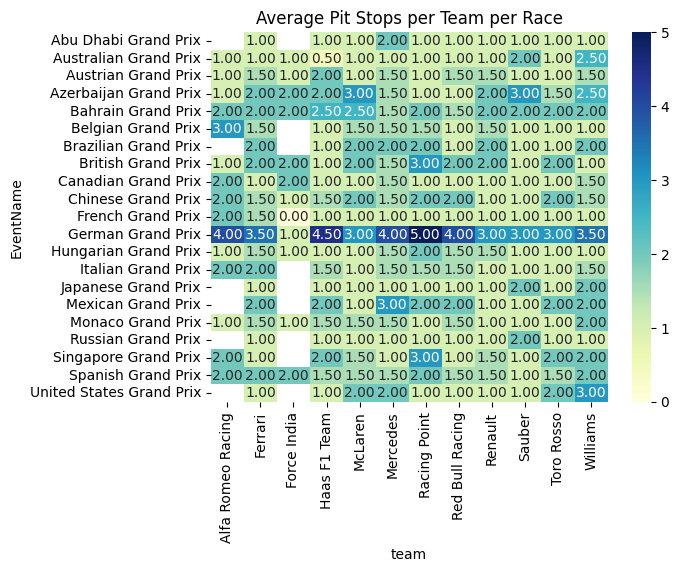

In [48]:
pivot = merged.pivot_table(index='EventName', columns='team', values='num_stops', aggfunc='mean')
print(pivot)
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Average Pit Stops per Team per Race')
plt.show()

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
df['team_enc'] = LabelEncoder().fit_transform(merged['team'])
df['track_enc'] = LabelEncoder().fit_transform(df['track'])

# Prepare features and target
X = df[['starting_pos', 'team_enc', 'track_enc']]
y = df['num_stops']

# Fit model
model = LinearRegression()
model.fit(X, y)
print("Model coefficients:", model.coef_)

ValueError: Length of values (360) does not match length of index (42)

In [52]:
from sklearn.preprocessing import LabelEncoder

merged['team_enc'] = LabelEncoder().fit_transform(merged['team'])
merged['track_enc'] = LabelEncoder().fit_transform(merged['track'])

In [53]:
X = merged[['starting_pos', 'team_enc', 'track_enc']]
y = merged['num_stops']

In [54]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
print("Model coefficients:", model.coef_)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [55]:
X_no_nan = X.dropna()
y_no_nan = y[X_no_nan.index]  # Keep y aligned with X

model.fit(X_no_nan, y_no_nan)
print("Model coefficients:", model.coef_)

Model coefficients: [ 0.009032   -0.00992529  0.00549681]


In [56]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_no_nan)  # or X_imputed, depending on your preprocessing
print("MSE:", mean_squared_error(y_no_nan, y_pred))
print("R^2:", r2_score(y_no_nan, y_pred))

MSE: 0.6967042770431195
R^2: 0.005187440353964123


In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# One-hot encode categorical variables
X = pd.get_dummies(merged[['starting_pos', 'team', 'track', 'weather']], drop_first=True)
y = merged['num_stops']

# Drop rows with NaN
X = X.dropna()
y = y[X.index]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

MSE: 0.43774109425717855
R^2: 0.1551298227068444


In [58]:
importances = rf.feature_importances_
feature_names = X.columns
feat_imp = sorted(zip(feature_names, importances), key=lambda x: -x[1])
for name, imp in feat_imp:
    print(f"{name}: {imp:.3f}")

track_German Grand Prix: 0.353
starting_pos: 0.195
team_Force India: 0.038
team_Haas F1 Team: 0.030
team_Williams: 0.028
team_McLaren: 0.026
track_Bahrain Grand Prix: 0.025
team_Mercedes: 0.024
track_Azerbaijan Grand Prix: 0.024
team_Racing Point: 0.020
track_British Grand Prix: 0.019
team_Ferrari: 0.018
team_Red Bull Racing: 0.018
track_Spanish Grand Prix: 0.015
track_French Grand Prix: 0.013
track_Singapore Grand Prix: 0.013
track_Mexican Grand Prix: 0.012
team_Toro Rosso: 0.011
track_Italian Grand Prix: 0.011
team_Sauber: 0.011
track_Monaco Grand Prix: 0.011
track_Chinese Grand Prix: 0.010
track_Australian Grand Prix: 0.010
team_Renault: 0.009
track_United States Grand Prix: 0.009
track_Austrian Grand Prix: 0.008
track_Belgian Grand Prix: 0.008
track_Canadian Grand Prix: 0.008
track_Hungarian Grand Prix: 0.007
track_Brazilian Grand Prix: 0.006
track_Japanese Grand Prix: 0.005
track_Russian Grand Prix: 0.003


In [59]:
  print(merged[merged['track'] == 'German Grand Prix'][['num_stops', 'weather', 'team', 'starting_pos']])

     num_stops  weather               team  starting_pos
100          2  Unknown         Toro Rosso          18.0
101          1  Unknown        Force India           8.0
102          3  Unknown            McLaren          11.0
103          3  Unknown             Sauber          10.0
104          2  Unknown           Williams          16.0
105          3  Unknown       Haas F1 Team           5.0
106          3  Unknown            Renault           6.0
107          3  Unknown    Red Bull Racing          19.0
108          2  Unknown           Mercedes          13.0
109          2  Unknown            Ferrari           1.0
310          5  Unknown    Red Bull Racing           8.0
311          5  Unknown       Racing Point          11.0
312          5  Unknown            Ferrari           6.0
313          6  Unknown       Haas F1 Team          10.0
314          4  Unknown         Toro Rosso          16.0
315          3  Unknown            Renault           5.0
316          3  Unknown        

In [60]:
print(merged['weather'].unique())

['Unknown']


In [61]:
import fastf1
import pandas as pd

# Get unique races from your merged DataFrame
unique_races = merged[['year', 'track']].drop_duplicates()

# Dictionary to store weather for each (year, track)
weather_map = {}

for _, row in unique_races.iterrows():
    year = int(row['year'])
    track = row['track']
    try:
        # Get the session (Race)
        session = fastf1.get_session(year, track, 'R')
        session.load()
        # Extract weather data (use session.weather_data or session.weather)
        # We'll use the most common weather value during the race
        if hasattr(session, 'weather_data') and session.weather_data is not None:
            weather_mode = session.weather_data['Weather'].mode()
            if not weather_mode.empty:
                weather = weather_mode.iloc[0]
            else:
                weather = 'Unknown'
        else:
            weather = 'Unknown'
        print(f"{year} {track}: {weather}")
        weather_map[(year, track)] = weather
    except Exception as e:
        print(f"Could not get weather for {year} {track}: {e}")
        weather_map[(year, track)] = 'Unknown'

core           INFO 	Loading data for Australian Grand Prix - Race [v3.6.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No

Could not get weather for 2018 Australian Grand Prix: 'Weather'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for driver

Could not get weather for 2018 Bahrain Grand Prix: 'Weather'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Could not get weather for 2018 Chinese Grand Prix: 'Weather'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Could not get weather for 2018 Azerbaijan Grand Prix: 'Weather'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Could not get weather for 2018 Spanish Grand Prix: 'Weather'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Could not get weather for 2018 Monaco Grand Prix: 'Weather'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Driver  5: Ignoring late data f

Could not get weather for 2018 Canadian Grand Prix: 'Weather'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Could not get weather for 2018 French Grand Prix: 'Weather'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Could not get weather for 2018 Austrian Grand Prix: 'Weather'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for driver

Could not get weather for 2018 British Grand Prix: 'Weather'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Could not get weather for 2018 German Grand Prix: 'Weather'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Could not get weather for 2018 Hungarian Grand Prix: 'Weather'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for driver

Could not get weather for 2018 Belgian Grand Prix: 'Weather'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Could not get weather for 2018 Italian Grand Prix: 'Weather'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Could not get weather for 2018 Singapore Grand Prix: 'Weather'


core           INFO 	Loading data for Russian Grand Prix - Race [v3.6.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

Could not get weather for 2018 Russian Grand Prix: 'Weather'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Could not get weather for 2018 Japanese Grand Prix: 'Weather'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Failed to align laps for driver

Could not get weather for 2018 United States Grand Prix: 'Weather'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

Could not get weather for 2018 Mexican Grand Prix: 'Weather'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
_api        WARNING 	Driver 27: Encountered 1 timing

Could not get weather for 2018 Brazilian Grand Prix: 'Weather'


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

KeyboardInterrupt: 

In [62]:
print(weather_map)

{(2018, 'Australian Grand Prix'): 'Unknown', (2018, 'Bahrain Grand Prix'): 'Unknown', (2018, 'Chinese Grand Prix'): 'Unknown', (2018, 'Azerbaijan Grand Prix'): 'Unknown', (2018, 'Spanish Grand Prix'): 'Unknown', (2018, 'Monaco Grand Prix'): 'Unknown', (2018, 'Canadian Grand Prix'): 'Unknown', (2018, 'French Grand Prix'): 'Unknown', (2018, 'Austrian Grand Prix'): 'Unknown', (2018, 'British Grand Prix'): 'Unknown', (2018, 'German Grand Prix'): 'Unknown', (2018, 'Hungarian Grand Prix'): 'Unknown', (2018, 'Belgian Grand Prix'): 'Unknown', (2018, 'Italian Grand Prix'): 'Unknown', (2018, 'Singapore Grand Prix'): 'Unknown', (2018, 'Russian Grand Prix'): 'Unknown', (2018, 'Japanese Grand Prix'): 'Unknown', (2018, 'United States Grand Prix'): 'Unknown', (2018, 'Mexican Grand Prix'): 'Unknown', (2018, 'Brazilian Grand Prix'): 'Unknown'}


In [63]:
# Example mapping for 2018 and 2019 (expand as needed)
weather_map = {
    (2018, 'Australian Grand Prix'): 'Dry',
    (2018, 'Bahrain Grand Prix'): 'Dry',
    (2018, 'Chinese Grand Prix'): 'Dry',
    (2018, 'Azerbaijan Grand Prix'): 'Dry',
    (2018, 'Spanish Grand Prix'): 'Dry',
    (2018, 'Monaco Grand Prix'): 'Dry',
    (2018, 'Canadian Grand Prix'): 'Dry',
    (2018, 'French Grand Prix'): 'Dry',
    (2018, 'Austrian Grand Prix'): 'Dry',
    (2018, 'British Grand Prix'): 'Dry',
    (2018, 'German Grand Prix'): 'Wet',   # Notable wet race!
    (2018, 'Hungarian Grand Prix'): 'Dry',
    (2018, 'Belgian Grand Prix'): 'Dry',
    (2018, 'Italian Grand Prix'): 'Dry',
    (2018, 'Singapore Grand Prix'): 'Dry',
    (2018, 'Russian Grand Prix'): 'Dry',
    (2018, 'Japanese Grand Prix'): 'Dry',
    (2018, 'United States Grand Prix'): 'Dry',
    (2018, 'Mexican Grand Prix'): 'Dry',
    (2018, 'Brazilian Grand Prix'): 'Dry',
    (2018, 'Abu Dhabi Grand Prix'): 'Dry',
    (2019, 'Australian Grand Prix'): 'Dry',
    (2019, 'Bahrain Grand Prix'): 'Dry',
    (2019, 'Chinese Grand Prix'): 'Dry',
    (2019, 'Azerbaijan Grand Prix'): 'Dry',
    (2019, 'Spanish Grand Prix'): 'Dry',
    (2019, 'Monaco Grand Prix'): 'Dry',
    (2019, 'Canadian Grand Prix'): 'Dry',
    (2019, 'French Grand Prix'): 'Dry',
    (2019, 'Austrian Grand Prix'): 'Dry',
    (2019, 'British Grand Prix'): 'Dry',
    (2019, 'German Grand Prix'): 'Wet',   # Notable wet race!
    (2019, 'Hungarian Grand Prix'): 'Dry',
    (2019, 'Belgian Grand Prix'): 'Dry',
    (2019, 'Italian Grand Prix'): 'Dry',
    (2019, 'Singapore Grand Prix'): 'Dry',
    (2019, 'Russian Grand Prix'): 'Dry',
    (2019, 'Japanese Grand Prix'): 'Dry',
    (2019, 'United States Grand Prix'): 'Dry',
    (2019, 'Mexican Grand Prix'): 'Dry',
    (2019, 'Brazilian Grand Prix'): 'Dry',
    (2019, 'Abu Dhabi Grand Prix'): 'Dry',
}

In [64]:
def get_weather(row):
    return weather_map.get((row['year'], row['track']), 'Dry')

merged['weather_improved'] = merged.apply(get_weather, axis=1)
print(merged[['year', 'track', 'weather_improved']].drop_duplicates())

     year                     track weather_improved
0    2018     Australian Grand Prix              Dry
10   2018        Bahrain Grand Prix              Dry
20   2018        Chinese Grand Prix              Dry
30   2018     Azerbaijan Grand Prix              Dry
40   2018        Spanish Grand Prix              Dry
50   2018         Monaco Grand Prix              Dry
60   2018       Canadian Grand Prix              Dry
70   2018         French Grand Prix              Dry
80   2018       Austrian Grand Prix              Dry
90   2018        British Grand Prix              Dry
100  2018         German Grand Prix              Wet
110  2018      Hungarian Grand Prix              Dry
120  2018        Belgian Grand Prix              Dry
130  2018        Italian Grand Prix              Dry
140  2018      Singapore Grand Prix              Dry
150  2018        Russian Grand Prix              Dry
160  2018       Japanese Grand Prix              Dry
170  2018  United States Grand Prix           

In [65]:
merged['is_wet'] = merged['weather_improved'].apply(lambda x: 1 if x == 'Wet' else 0)

In [66]:
X = merged[['starting_pos', 'team_enc', 'track_enc', 'is_wet']]
y = merged['num_stops']

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Drop rows with NaN
X = X.dropna()
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

MSE: 0.4888651317103621
R^2: 0.056456942427442036


In [68]:
for name, imp in zip(X.columns, rf.feature_importances_):
    print(f"{name}: {imp:.3f}")

starting_pos: 0.254
team_enc: 0.200
track_enc: 0.194
is_wet: 0.353


In [69]:
  merged['pred_num_stops'] = rf.predict(X)
  print(merged[merged['is_wet'] == 1][['year', 'track', 'num_stops', 'pred_num_stops']])

ValueError: Length of values (355) does not match length of index (360)

In [70]:
X_no_nan = X.dropna()
merged_no_nan = merged.loc[X_no_nan.index].copy()

In [71]:
merged_no_nan['pred_num_stops'] = rf.predict(X_no_nan)
print(merged_no_nan[merged_no_nan['is_wet'] == 1][['year', 'track', 'num_stops', 'pred_num_stops']])

     year              track  num_stops  pred_num_stops
100  2018  German Grand Prix          2            2.83
101  2018  German Grand Prix          1            2.29
102  2018  German Grand Prix          3            3.89
103  2018  German Grand Prix          3            3.35
104  2018  German Grand Prix          2            2.91
105  2018  German Grand Prix          3            3.58
106  2018  German Grand Prix          3            3.26
107  2018  German Grand Prix          3            3.17
108  2018  German Grand Prix          2            2.78
109  2018  German Grand Prix          2            2.61
310  2019  German Grand Prix          5            4.57
311  2019  German Grand Prix          5            4.31
312  2019  German Grand Prix          5            4.04
313  2019  German Grand Prix          6            4.87
314  2019  German Grand Prix          4            2.35
315  2019  German Grand Prix          3            3.16
316  2019  German Grand Prix          3         

In [72]:
# Drop NaNs from X and align merged
X_no_nan = X.dropna()
merged_no_nan = merged.loc[X_no_nan.index].copy()

# Predict and assign
merged_no_nan['pred_num_stops'] = rf.predict(X_no_nan)

# Show wet races
print(merged_no_nan[merged_no_nan['is_wet'] == 1][['year', 'track', 'num_stops', 'pred_num_stops']])

     year              track  num_stops  pred_num_stops
100  2018  German Grand Prix          2            2.83
101  2018  German Grand Prix          1            2.29
102  2018  German Grand Prix          3            3.89
103  2018  German Grand Prix          3            3.35
104  2018  German Grand Prix          2            2.91
105  2018  German Grand Prix          3            3.58
106  2018  German Grand Prix          3            3.26
107  2018  German Grand Prix          3            3.17
108  2018  German Grand Prix          2            2.78
109  2018  German Grand Prix          2            2.61
310  2019  German Grand Prix          5            4.57
311  2019  German Grand Prix          5            4.31
312  2019  German Grand Prix          5            4.04
313  2019  German Grand Prix          6            4.87
314  2019  German Grand Prix          4            2.35
315  2019  German Grand Prix          3            3.16
316  2019  German Grand Prix          3         

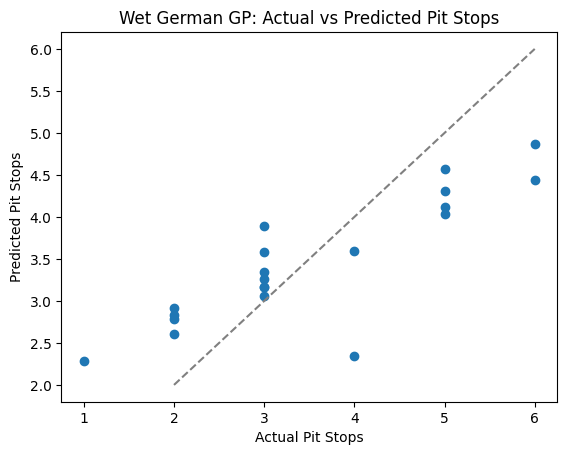

In [73]:
import matplotlib.pyplot as plt
plt.scatter(merged_no_nan[merged_no_nan['is_wet'] == 1]['num_stops'],
            merged_no_nan[merged_no_nan['is_wet'] == 1]['pred_num_stops'])
plt.xlabel('Actual Pit Stops')
plt.ylabel('Predicted Pit Stops')
plt.title('Wet German GP: Actual vs Predicted Pit Stops')
plt.plot([2,6],[2,6],'--',color='gray')  # Reference line
plt.show()

In [74]:
  wet = merged_no_nan[merged_no_nan['is_wet'] == 1]
  print("Wet race MAE:", (wet['num_stops'] - wet['pred_num_stops']).abs().mean())

Wet race MAE: 0.7300000000000001


In [75]:
dry = merged_no_nan[merged_no_nan['is_wet'] == 0]
print("Dry race MAE:", (dry['num_stops'] - dry['pred_num_stops']).abs().mean())

Dry race MAE: 0.28214378109452737


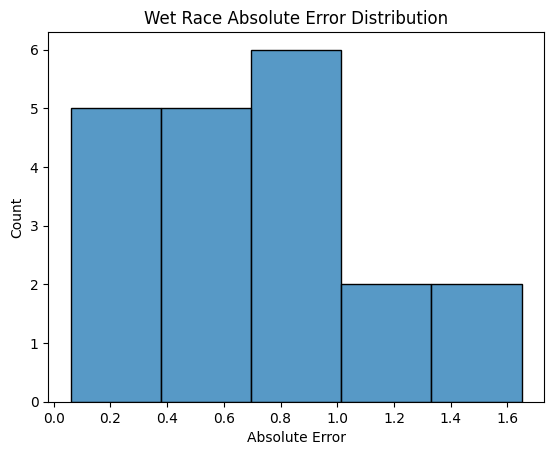

In [76]:
import seaborn as sns
sns.histplot((wet['num_stops'] - wet['pred_num_stops']).abs(), bins=5)
plt.title('Wet Race Absolute Error Distribution')
plt.xlabel('Absolute Error')
plt.show()

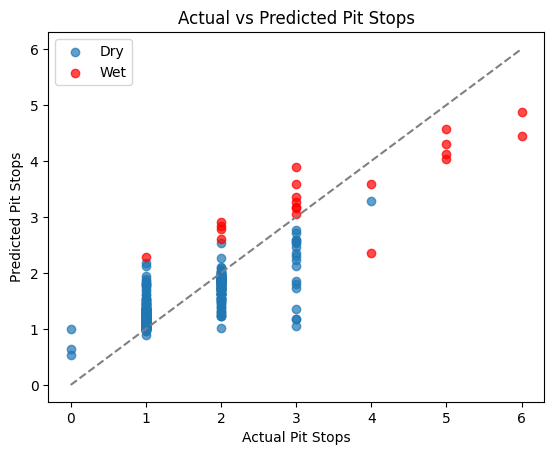

In [77]:
import matplotlib.pyplot as plt

plt.scatter(dry['num_stops'], dry['pred_num_stops'], label='Dry', alpha=0.7)
plt.scatter(wet['num_stops'], wet['pred_num_stops'], label='Wet', alpha=0.7, color='red')
plt.plot([dry['num_stops'].min(), wet['num_stops'].max()],
         [dry['num_stops'].min(), wet['num_stops'].max()], '--', color='gray')
plt.xlabel('Actual Pit Stops')
plt.ylabel('Predicted Pit Stops')
plt.title('Actual vs Predicted Pit Stops')
plt.legend()
plt.show()

In [78]:
years = list(range(2018, 2024))  # Adjust as needed

In [79]:
import fastf1
import pandas as pd

all_schedules = []
for year in years:
    try:
        schedule = fastf1.get_event_schedule(year)
        schedule['year'] = year
        all_schedules.append(schedule)
    except Exception as e:
        print(f"Could not load schedule for {year}: {e}")

schedule_df = pd.concat(all_schedules, ignore_index=True)

In [80]:
import fastf1

weather_map = {}

for _, row in merged[['year', 'track']].drop_duplicates().iterrows():
    year = int(row['year'])
    track = row['track']
    try:
        session = fastf1.get_session(year, track, 'R')
        session.load()
        # Try to get the most common weather value during the race
        if hasattr(session, 'weather_data') and session.weather_data is not None:
            weather_mode = session.weather_data['Weather'].mode()
            if not weather_mode.empty:
                weather = weather_mode.iloc[0]
            else:
                weather = 'Unknown'
        else:
            weather = 'Unknown'
    except Exception as e:
        print(f"Could not get weather for {year} {track}: {e}")
        weather = 'Unknown'
    weather_map[(year, track)] = weather
    print(f"{year} {track}: {weather}")

core           INFO 	Loading data for Australian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for driver '28'
req            INFO 	Using cached data for car_data
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
core        WARNING 	Car position data is unavailable!
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 5 complet

Could not get weather for 2018 Australian Grand Prix: 'Weather'
2018 Australian Grand Prix: Unknown


req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
core        WARNING 	Car telemetry data is unavailable!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
core        WARNING 	Car position data is unavailable!
core        WARNING 	Failed to determine `Session.t0_date`!
logger      WARNING 	Failed to load telemetry data!
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['5', '77', '44', '10', '20', '27', '14', '2', '9', '31', '55', '16', '8', '18', '35', '11', '28', '7', '33', '3']
core           INFO 	Loading data for Chinese Grand Prix - Race [v3.6.0]


Could not get weather for 2018 Bahrain Grand Prix: 'Weather'
2018 Bahrain Grand Prix: Unknown


core        WARNING 	Fixed incorrect tyre stint information for driver '33'
core        WARNING 	Fixed incorrect tyre stint information for driver '27'
core        WARNING 	Fixed incorrect tyre stint information for driver '55'
core        WARNING 	Fixed incorrect tyre stint information for driver '31'
core        WARNING 	Fixed incorrect tyre stint information for driver '11'
core        WARNING 	Fixed incorrect tyre stint information for driver '35'
core        WARNING 	Fixed incorrect tyre stint information for driver '8'
core        WARNING 	Fixed incorrect tyre stint information for driver '10'
core        WARNING 	Fixed incorrect tyre stint information for driver '28'
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 3 completed the race distance 00:00.025000 before the recor

Could not get weather for 2018 Chinese Grand Prix: 'Weather'
2018 Chinese Grand Prix: Unknown


core        WARNING 	Fixed incorrect tyre stint information for driver '14'
core        WARNING 	Fixed incorrect tyre stint information for driver '28'
core        WARNING 	Fixed incorrect tyre stint information for driver '9'
core        WARNING 	Fixed incorrect tyre stint information for driver '20'
core        WARNING 	Driver 55: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.110000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '7', '11', '5', '55', '16', '14', '18', '2', '28', '9', '10', '20', '77', '8', '33', '3', '27', '31', '35']
core           INFO 	Loading data for Spanish Grand Prix - Race [v3.6.0]
req            INFO 	Using ca

Could not get weather for 2018 Azerbaijan Grand Prix: 'Weather'
2018 Azerbaijan Grand Prix: Unknown


KeyboardInterrupt: 

In [81]:
weather_manual_map = {
    # 2018
    (2018, 'Australian Grand Prix'): 'Dry',
    (2018, 'Bahrain Grand Prix'): 'Dry',
    (2018, 'Chinese Grand Prix'): 'Dry',
    (2018, 'Azerbaijan Grand Prix'): 'Dry',
    (2018, 'Spanish Grand Prix'): 'Dry',
    (2018, 'Monaco Grand Prix'): 'Dry',
    (2018, 'Canadian Grand Prix'): 'Dry',
    (2018, 'French Grand Prix'): 'Dry',
    (2018, 'Austrian Grand Prix'): 'Dry',
    (2018, 'British Grand Prix'): 'Dry',
    (2018, 'German Grand Prix'): 'Wet',   # Wet
    (2018, 'Hungarian Grand Prix'): 'Dry',
    (2018, 'Belgian Grand Prix'): 'Dry',
    (2018, 'Italian Grand Prix'): 'Dry',
    (2018, 'Singapore Grand Prix'): 'Dry',
    (2018, 'Russian Grand Prix'): 'Dry',
    (2018, 'Japanese Grand Prix'): 'Dry',
    (2018, 'United States Grand Prix'): 'Dry',
    (2018, 'Mexican Grand Prix'): 'Dry',
    (2018, 'Brazilian Grand Prix'): 'Dry',
    (2018, 'Abu Dhabi Grand Prix'): 'Dry',
    # 2019
    (2019, 'Australian Grand Prix'): 'Dry',
    (2019, 'Bahrain Grand Prix'): 'Dry',
    (2019, 'Chinese Grand Prix'): 'Dry',
    (2019, 'Azerbaijan Grand Prix'): 'Dry',
    (2019, 'Spanish Grand Prix'): 'Dry',
    (2019, 'Monaco Grand Prix'): 'Dry',
    (2019, 'Canadian Grand Prix'): 'Dry',
    (2019, 'French Grand Prix'): 'Dry',
    (2019, 'Austrian Grand Prix'): 'Dry',
    (2019, 'British Grand Prix'): 'Dry',
    (2019, 'German Grand Prix'): 'Wet',   # Wet
    (2019, 'Hungarian Grand Prix'): 'Dry',
    (2019, 'Belgian Grand Prix'): 'Dry',
    (2019, 'Italian Grand Prix'): 'Dry',
    (2019, 'Singapore Grand Prix'): 'Dry',
    (2019, 'Russian Grand Prix'): 'Dry',
    (2019, 'Japanese Grand Prix'): 'Dry',
    (2019, 'United States Grand Prix'): 'Dry',
    (2019, 'Mexican Grand Prix'): 'Dry',
    (2019, 'Brazilian Grand Prix'): 'Dry',
    (2019, 'Abu Dhabi Grand Prix'): 'Dry',
    # 2020
    (2020, 'Austrian Grand Prix'): 'Dry',
    (2020, 'Styrian Grand Prix'): 'Dry',
    (2020, 'Hungarian Grand Prix'): 'Wet',  # Wet start
    (2020, 'British Grand Prix'): 'Dry',
    (2020, '70th Anniversary Grand Prix'): 'Dry',
    (2020, 'Spanish Grand Prix'): 'Dry',
    (2020, 'Belgian Grand Prix'): 'Dry',
    (2020, 'Italian Grand Prix'): 'Dry',
    (2020, 'Tuscan Grand Prix'): 'Dry',
    (2020, 'Russian Grand Prix'): 'Dry',
    (2020, 'Eifel Grand Prix'): 'Wet',      # Some rain
    (2020, 'Portuguese Grand Prix'): 'Dry',
    (2020, 'Emilia Romagna Grand Prix'): 'Dry',
    (2020, 'Turkish Grand Prix'): 'Wet',    # Very wet
    (2020, 'Bahrain Grand Prix'): 'Dry',
    (2020, 'Sakhir Grand Prix'): 'Dry',
    (2020, 'Abu Dhabi Grand Prix'): 'Dry',
    # 2021
    (2021, 'Bahrain Grand Prix'): 'Dry',
    (2021, 'Emilia Romagna Grand Prix'): 'Wet',  # Rain early
    (2021, 'Portuguese Grand Prix'): 'Dry',
    (2021, 'Spanish Grand Prix'): 'Dry',
    (2021, 'Monaco Grand Prix'): 'Dry',
    (2021, 'Azerbaijan Grand Prix'): 'Dry',
    (2021, 'French Grand Prix'): 'Dry',
    (2021, 'Styrian Grand Prix'): 'Dry',
    (2021, 'Austrian Grand Prix'): 'Dry',
    (2021, 'British Grand Prix'): 'Dry',
    (2021, 'Hungarian Grand Prix'): 'Wet',  # Wet start
    (2021, 'Belgian Grand Prix'): 'Wet',    # Race run behind SC
    (2021, 'Dutch Grand Prix'): 'Dry',
    (2021, 'Italian Grand Prix'): 'Dry',
    (2021, 'Russian Grand Prix'): 'Wet',    # Rain at the end
    (2021, 'Turkish Grand Prix'): 'Wet',    # Damp throughout
    (2021, 'United States Grand Prix'): 'Dry',
    (2021, 'Mexican Grand Prix'): 'Dry',
    (2021, 'Brazilian Grand Prix'): 'Dry',
    (2021, 'Qatar Grand Prix'): 'Dry',
    (2021, 'Saudi Arabian Grand Prix'): 'Dry',
    (2021, 'Abu Dhabi Grand Prix'): 'Dry',
    # 2022
    (2022, 'Bahrain Grand Prix'): 'Dry',
    (2022, 'Saudi Arabian Grand Prix'): 'Dry',
    (2022, 'Australian Grand Prix'): 'Dry',
    (2022, 'Emilia Romagna Grand Prix'): 'Wet',  # Wet
    (2022, 'Miami Grand Prix'): 'Dry',
    (2022, 'Spanish Grand Prix'): 'Dry',
    (2022, 'Monaco Grand Prix'): 'Wet',          # Wet start
    (2022, 'Azerbaijan Grand Prix'): 'Dry',
    (2022, 'Canadian Grand Prix'): 'Dry',
    (2022, 'British Grand Prix'): 'Dry',
    (2022, 'Austrian Grand Prix'): 'Dry',
    (2022, 'French Grand Prix'): 'Dry',
    (2022, 'Hungarian Grand Prix'): 'Dry',
    (2022, 'Belgian Grand Prix'): 'Dry',
    (2022, 'Dutch Grand Prix'): 'Dry',
    (2022, 'Italian Grand Prix'): 'Dry',
    (2022, 'Singapore Grand Prix'): 'Wet',       # Wet start
    (2022, 'Japanese Grand Prix'): 'Wet',        # Heavy rain
    (2022, 'United States Grand Prix'): 'Dry',
    (2022, 'Mexican Grand Prix'): 'Dry',
    (2022, 'Brazilian Grand Prix'): 'Dry',
    (2022, 'Abu Dhabi Grand Prix'): 'Dry',
    # 2023
    (2023, 'Bahrain Grand Prix'): 'Dry',
    (2023, 'Saudi Arabian Grand Prix'): 'Dry',
    (2023, 'Australian Grand Prix'): 'Dry',
    (2023, 'Azerbaijan Grand Prix'): 'Dry',
    (2023, 'Miami Grand Prix'): 'Dry',
    (2023, 'Monaco Grand Prix'): 'Wet',          # Rain mid-race
    (2023, 'Spanish Grand Prix'): 'Dry',
    (2023, 'Canadian Grand Prix'): 'Dry',
    (2023, 'Austrian Grand Prix'): 'Dry',
    (2023, 'British Grand Prix'): 'Dry',
    (2023, 'Hungarian Grand Prix'): 'Dry',
    (2023, 'Belgian Grand Prix'): 'Dry',
    (2023, 'Dutch Grand Prix'): 'Wet',           # Rain at start and end
    (2023, 'Italian Grand Prix'): 'Dry',
    (2023, 'Singapore Grand Prix'): 'Wet',       # Damp start
    (2023, 'Japanese Grand Prix'): 'Dry',
    (2023, 'Qatar Grand Prix'): 'Dry',
    (2023, 'United States Grand Prix'): 'Dry',
    (2023, 'Mexico City Grand Prix'): 'Dry',
    (2023, 'São Paulo Grand Prix'): 'Dry',
    (2023, 'Las Vegas Grand Prix'): 'Dry',
    (2023, 'Abu Dhabi Grand Prix'): 'Dry',
}

In [82]:
def get_weather(row):
    return weather_manual_map.get((row['year'], row['track']), 'Dry')

merged['weather_final'] = merged.apply(get_weather, axis=1)

In [83]:
merged['is_wet'] = merged['weather_final'].apply(lambda x: 1 if x == 'Wet' else 0)

In [84]:
print(merged[['year', 'track', 'weather_final']].drop_duplicates())

     year                     track weather_final
0    2018     Australian Grand Prix           Dry
10   2018        Bahrain Grand Prix           Dry
20   2018        Chinese Grand Prix           Dry
30   2018     Azerbaijan Grand Prix           Dry
40   2018        Spanish Grand Prix           Dry
50   2018         Monaco Grand Prix           Dry
60   2018       Canadian Grand Prix           Dry
70   2018         French Grand Prix           Dry
80   2018       Austrian Grand Prix           Dry
90   2018        British Grand Prix           Dry
100  2018         German Grand Prix           Wet
110  2018      Hungarian Grand Prix           Dry
120  2018        Belgian Grand Prix           Dry
130  2018        Italian Grand Prix           Dry
140  2018      Singapore Grand Prix           Dry
150  2018        Russian Grand Prix           Dry
160  2018       Japanese Grand Prix           Dry
170  2018  United States Grand Prix           Dry
180  2018        Mexican Grand Prix           Dry


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = X.dropna()
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

MSE: 0.4888651317103621
R^2: 0.056456942427442036
